## Import Libraries

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

C:\Users\Jaikrishna\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


## IPL ball by ball data

In [3]:
df = pd.read_csv("ipl_ball_by_ball_data.csv")

In [4]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


## Data where the striker is MS Dhoni

In [5]:
msd_df=df[(df['striker']=='MS Dhoni')]

In [6]:
msd_df.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
556,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN
557,335983,2008,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## To check last three years

In [7]:
msd_df['year']=pd.to_datetime(msd_df['start_date']).dt.year

C:\Users\Jaikrishna\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
msd_3yr=msd_df[((msd_df['year']==2021) | (msd_df['year']==2020) | (msd_df['year']==2019))]

In [9]:
msd_3yr.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
165761,1175360,2019,2019-03-26,Arun Jaitley Stadium,2,12.2,Chennai Super Kings,Delhi Capitals,MS Dhoni,KM Jadhav,AR Patel,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
165764,1175360,2019,2019-03-26,Arun Jaitley Stadium,2,15.5,Chennai Super Kings,Delhi Capitals,MS Dhoni,KM Jadhav,K Rabada,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [10]:
ms_last_over=msd_3yr[(msd_3yr['ball']>19)&(msd_3yr['wides'].isnull()==True)]

# Strike Rate in Last Over (Last 3 years)

In [11]:
100*ms_last_over['runs_off_bat'].sum()/ms_last_over['ball'].count()

276.9230769230769

In [12]:
MSD_final_ovr_sc= pd.DataFrame(ms_last_over.groupby('striker')['runs_off_bat'].sum()).reset_index()

## Last over played

In [13]:
len(ms_last_over['match_id'].unique())

10

In [14]:
MSD_final_ovr_sc['Innings']=len(ms_last_over['match_id'].unique())

## Balls Played

In [15]:
ms_last_over['ball'].count()

39

In [16]:
MSD_final_ovr_sc['ball']=ms_last_over['ball'].count()

## 4s & 6s

In [17]:
ms_last_over[(ms_last_over['runs_off_bat']==6)]['ball'].count()

11

In [18]:
MSD_final_ovr_sc['4s']=ms_last_over[(ms_last_over['runs_off_bat']==6)]['ball'].count()

In [19]:
ms_last_over[(ms_last_over['runs_off_bat']==4)]['ball'].count()

4

In [20]:
MSD_final_ovr_sc['6s']=ms_last_over[(ms_last_over['runs_off_bat']==4)]['ball'].count()

## Strike Rate

In [21]:
MSD_final_ovr_sc['SR']=100*ms_last_over['runs_off_bat'].sum()/ms_last_over['ball'].count()

## Boundary Percentage

In [22]:
MSD_final_ovr_sc['Runs from Boundary %']=100*((MSD_final_ovr_sc['4s']*4+MSD_final_ovr_sc['6s']*6)/MSD_final_ovr_sc['runs_off_bat'])

## MSD Last over scorecard

In [23]:
MSD_final_ovr_sc

,striker,runs_off_bat,Innings,ball,4s,6s,SR,Runs from Boundary %
0,MS Dhoni,108,10,39,11,4,276.923077,62.962963


# Strike Rate in death overs (Last 3 years)

In [24]:
ms_death_over=msd_3yr[(msd_3yr['ball']>16)&(msd_3yr['wides'].isnull()==True)]

In [25]:
100*ms_death_over['runs_off_bat'].sum()/ms_death_over['ball'].count()

178.4688995215311

## Dismissed in death overs

In [26]:
dismiss_death_ovr=ms_death_over[(ms_death_over['player_dismissed']=='MS Dhoni')]

In [27]:
dismiss_death_ovr['ball'].count()

9

In [28]:
dismiss_death_ovr.groupby('wicket_type')['ball'].count()

wicket_type
bowled     2
caught     6
run out    1
Name: ball, dtype: int64

In [29]:
len(ms_death_over['match_id'].unique())

21

## Death over score card

In [30]:
MSD_dth_ovr_sc= pd.DataFrame(ms_death_over.groupby('striker')['runs_off_bat'].sum()).reset_index()

In [31]:
MSD_dth_ovr_sc['ball']=ms_death_over['ball'].count()

In [32]:
MSD_dth_ovr_sc['innings']=ms_death_over['match_id'].nunique()

In [33]:
MSD_dth_ovr_sc['4s']=ms_death_over[(ms_death_over['runs_off_bat']==4)]['ball'].count()

In [34]:
MSD_dth_ovr_sc['6s']=ms_death_over[(ms_death_over['runs_off_bat']==6)]['ball'].count()

In [35]:
MSD_dth_ovr_sc['SR']=100*MSD_dth_ovr_sc['runs_off_bat']/MSD_dth_ovr_sc['ball']

In [36]:
MSD_dth_ovr_sc['Runs from Boundary %']=100*((MSD_dth_ovr_sc['4s']*4+MSD_dth_ovr_sc['6s']*6)/MSD_dth_ovr_sc['runs_off_bat'])

In [37]:
MSD_dth_ovr_sc

,striker,runs_off_bat,ball,innings,4s,6s,SR,Runs from Boundary %
0,MS Dhoni,373,209,21,29,22,178.4689,66.487936


## Last over stats (Last 3 years)

In [38]:
df['year']=pd.to_datetime(df['start_date']).dt.year

In [39]:
df_3yr=df[((df['year']==2021) | (df['year']==2020) | (df['year']==2019))]

In [40]:
df_3yr.head(2)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
164745,1175356,2019,2019-03-23,MA Chidambaram Stadium,2,6.7,Chennai Super Kings,Royal Challengers Bangalore,SK Raina,AT Rayudu,NA Saini,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
164746,1175356,2019,2019-03-23,MA Chidambaram Stadium,2,5.5,Chennai Super Kings,Royal Challengers Bangalore,SK Raina,AT Rayudu,MM Ali,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [41]:
df_last_over=df_3yr[(df_3yr['ball']>19)&(df_3yr['wides'].isnull()==True)]

In [42]:
last_over_runs = pd.DataFrame(df_last_over.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)).reset_index()

In [43]:
last_over_runs.head(2)

,striker,runs_off_bat
0,KA Pollard,149
1,RA Jadeja,134


In [44]:
last_over_balls = pd.DataFrame(df_last_over.groupby('striker')['ball'].count().sort_values(ascending=False)).reset_index()

In [45]:
last_over_balls.head(2)

,striker,ball
0,KA Pollard,56
1,RA Jadeja,46


In [46]:
last_ovr_stats=last_over_runs.merge(last_over_balls,how='left',on='striker')

In [47]:
last_ovr_stats['SR']=100*(last_ovr_stats['runs_off_bat']/last_ovr_stats['ball'])

In [48]:
last_ovr_stats[last_ovr_stats['runs_off_bat']>30].head(2)

,striker,runs_off_bat,ball,SR
0,KA Pollard,149,56,266.071429
1,RA Jadeja,134,46,291.304348


##  Sorting based on Strike Rate (Minimum 30 runs scored)

In [49]:
sort_SR=last_ovr_stats[(last_ovr_stats['runs_off_bat']>30)].sort_values('SR', ascending=False).reset_index()

In [50]:
sort_SR.drop('index',axis=1,inplace=True)

In [51]:
sort_SR.head(5)

,striker,runs_off_bat,ball,SR
0,HH Pandya,121,40,302.500000
1,RA Jadeja,134,46,291.304348
2,MP Stoinis,99,34,291.176471
3,MS Dhoni,108,39,276.923077
4,AB de Villiers,96,35,274.285714


# Visualization

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

## Dhoni is in 4th Place (No. of Runs scored in the last over of the innings)

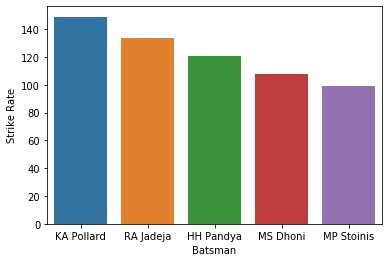

In [53]:
sns.barplot(data=last_ovr_stats.head(5),x='striker',y='runs_off_bat')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.show()

## Dhoni is in 4th Place (Strike Rate in the last over of the innings)

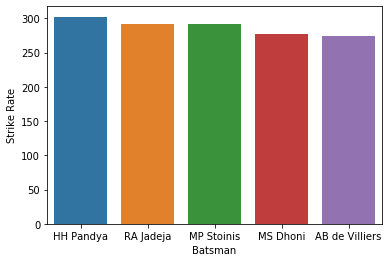

In [54]:
sns.barplot(data=sort_SR.head(5),x='striker',y='SR')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.show()

## MSD Overall Data (from 2019 to 2021)

In [55]:
msd_ovrll=msd_3yr[(msd_3yr['wides'].isnull()==True)]

In [56]:
msd_ovrll['runs_off_bat'].sum()

653

In [67]:
msd_ovrll_sc = pd.DataFrame(msd_ovrll.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)).reset_index()

In [68]:
msd_ovrll_sc['Innings']=msd_ovrll['match_id'].nunique()

In [69]:
msd_ovrll_sc['ball']=msd_ovrll['ball'].count()

In [70]:
msd_ovrll_sc['6s']=msd_ovrll[(msd_ovrll['runs_off_bat']==6)]['ball'].count()

In [71]:
msd_ovrll_sc['4s']=msd_ovrll[(msd_ovrll['runs_off_bat']==4)]['ball'].count()

In [64]:
msd_ovrll_sc = pd.DataFrame(msd_ovrll.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)).reset_index()

In [72]:
msd_ovrll_sc['SR']=100*msd_ovrll_sc['runs_off_bat']/msd_ovrll_sc['ball']

In [73]:
msd_ovrll_sc['Runs from Boundary %']=((msd_ovrll_sc['4s']*4+msd_ovrll_sc['6s']*6)/msd_ovrll_sc['runs_off_bat'])*100

In [74]:
msd_ovrll_sc

,striker,runs_off_bat,Innings,ball,6s,4s,SR,Runs from Boundary %
0,MS Dhoni,653,28,511,31,42,127.78865,54.211332


## MSD year wise Data

In [75]:
msd_year_wise=msd_3yr[(msd_3yr['wides'].isnull()==True)]

In [76]:
msd_yr_ws_sc=pd.DataFrame(msd_year_wise.groupby('year')['runs_off_bat'].sum()).reset_index()

## Balls Played

In [77]:
msd_yr_ws_sc['balls']=0

In [78]:
msd_yr_ws_sc.at[0, 'balls'] = msd_year_wise[(msd_year_wise['year']==2019)]['runs_off_bat'].count()

In [79]:
msd_yr_ws_sc.at[1, 'balls'] = msd_year_wise[(msd_year_wise['year']==2020)]['runs_off_bat'].count()

In [80]:
msd_yr_ws_sc.at[2, 'balls'] = msd_year_wise[(msd_year_wise['year']==2021)]['runs_off_bat'].count()

In [81]:
msd_yr_ws_sc['SR']=100*msd_yr_ws_sc['runs_off_bat']/msd_yr_ws_sc['balls']

## 4s

In [82]:
msd_yr_ws_sc['4s']=0

In [83]:
msd_yr_ws_sc.at[0, '4s'] = msd_year_wise[(msd_year_wise['runs_off_bat']==4)&(msd_year_wise['year']==2019)]['runs_off_bat'].count()

In [84]:
msd_yr_ws_sc.at[1, '4s'] = msd_year_wise[(msd_year_wise['runs_off_bat']==4)&(msd_year_wise['year']==2020)]['runs_off_bat'].count()

In [85]:
msd_yr_ws_sc.at[2, '4s'] = msd_year_wise[(msd_year_wise['runs_off_bat']==4)&(msd_year_wise['year']==2021)]['runs_off_bat'].count()

## 6s

In [86]:
msd_yr_ws_sc['6s']=0

In [87]:
msd_yr_ws_sc.at[0, '6s'] = msd_year_wise[(msd_year_wise['runs_off_bat']==6)&(msd_year_wise['year']==2019)]['runs_off_bat'].count()

In [88]:
msd_yr_ws_sc.at[1, '6s'] = msd_year_wise[(msd_year_wise['runs_off_bat']==6)&(msd_year_wise['year']==2020)]['runs_off_bat'].count()

In [89]:
msd_yr_ws_sc.at[2, '6s'] = msd_year_wise[(msd_year_wise['runs_off_bat']==6)&(msd_year_wise['year']==2021)]['runs_off_bat'].count()

## Dismissed

In [90]:
msd_yr_ws_sc['Out']=0

In [91]:
msd_yr_ws_sc.at[0, 'Out'] = msd_year_wise[(msd_year_wise['player_dismissed']=='MS Dhoni')&(msd_year_wise['year']==2019)]['runs_off_bat'].count()

In [92]:
msd_yr_ws_sc.at[1, 'Out'] = msd_year_wise[(msd_year_wise['player_dismissed']=='MS Dhoni')&(msd_year_wise['year']==2020)]['runs_off_bat'].count()

In [93]:
msd_yr_ws_sc.at[2, 'Out'] = msd_year_wise[(msd_year_wise['player_dismissed']=='MS Dhoni')&(msd_year_wise['year']==2021)]['runs_off_bat'].count()

## Innings

In [94]:
msd_yr_ws_sc['innings']=0

In [95]:
msd_yr_ws_sc.at[0, 'innings'] = msd_year_wise[(msd_year_wise['year']==2019)]['match_id'].nunique()

In [96]:
msd_yr_ws_sc.at[1, 'innings'] = msd_year_wise[(msd_year_wise['year']==2020)]['match_id'].nunique()

In [97]:
msd_yr_ws_sc.at[2, 'innings'] = msd_year_wise[(msd_year_wise['year']==2021)]['match_id'].nunique()

# Year Wise Data

In [98]:
msd_yr_ws_sc

,year,runs_off_bat,balls,SR,4s,6s,Out,innings
0,2019,416,309,134.627832,22,23,4,12
1,2020,200,172,116.279070,16,7,8,12
2,2021,37,30,123.333333,4,1,3,4


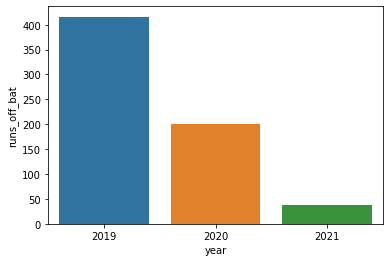

In [99]:
sns.barplot(data=msd_yr_ws_sc,x='year',y='runs_off_bat')

In [100]:
df.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2008


In [101]:
msd_df['year']=pd.to_datetime(msd_df['start_date']).dt.year

C:\Users\Jaikrishna\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
msd_df_dbi=msd_df[(msd_df['wides'].isnull()==True)]

In [103]:
dubai_df=pd.DataFrame(msd_df_dbi[(msd_df_dbi['venue']=='Dubai International Cricket Stadium')|
      (msd_df_dbi['venue']=='Sheikh Zayed Stadium')|
      (msd_df_dbi['venue']=='Sharjah Cricket Stadium')].groupby('year')['match_id'].nunique()).reset_index()

In [104]:
dubai_df.rename(columns={'match_id':'Innings'})

,year,Innings
0,2014,5
1,2020,12


In [105]:
dubai_df_runs=pd.DataFrame(msd_df_dbi[(msd_df_dbi['venue']=='Dubai International Cricket Stadium')|
      (msd_df_dbi['venue']=='Sheikh Zayed Stadium')|
      (msd_df_dbi['venue']=='Sharjah Cricket Stadium')].groupby('year')['runs_off_bat'].sum()).reset_index()

In [106]:
dubai_df_runs

,year,runs_off_bat
0,2014,90
1,2020,200


In [107]:
dubai_df_balls=pd.DataFrame(msd_df_dbi[(msd_df_dbi['venue']=='Dubai International Cricket Stadium')|
      (msd_df_dbi['venue']=='Sheikh Zayed Stadium')|
      (msd_df_dbi['venue']=='Sharjah Cricket Stadium')].groupby('year')['ball'].count()).reset_index()

In [108]:
dubai_df_balls

,year,ball
0,2014,59
1,2020,172


In [109]:
dubai_df=dubai_df.merge(dubai_df_runs,how='left',on='year')

In [110]:
dubai_df=dubai_df.merge(dubai_df_balls,how='left',on='year')

In [111]:
dubai_df['SR']=100*dubai_df['runs_off_bat']/dubai_df['ball']

In [112]:
dubai_df.rename(columns={'match_id':'Innings'},inplace=True)

In [113]:
dubai_df

,year,Innings,runs_off_bat,ball,SR
0,2014,5,90,59,152.542373
1,2020,12,200,172,116.279070


In [114]:
dubai_full=df[(df['venue']=='Dubai International Cricket Stadium')|
      (df['venue']=='Sheikh Zayed Stadium')|
      (df['venue']=='Sharjah Cricket Stadium')]

In [115]:
dubai_df_all=pd.DataFrame(dubai_full.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False)).reset_index()

In [116]:
dubai_df_ball=pd.DataFrame(dubai_full.groupby('striker')['ball'].count().sort_values(ascending=False)).reset_index()

In [117]:
dubai_df_ball

,striker,ball
0,KL Rahul,645
1,DA Warner,570
2,S Dhawan,512
3,V Kohli,492
4,MK Pandey,481
5,SS Iyer,433
6,Q de Kock,423
7,AT Rayudu,417
8,SA Yadav,406
9,D Padikkal,398


In [118]:
dubai_df_all=dubai_df_all.merge(dubai_df_ball,how='left',on='striker')

In [119]:
dubai_df_all['SR']=100*dubai_df_all['runs_off_bat']/dubai_df_all['ball']

In [120]:
dubai_df_all=dubai_df_all[dubai_df_all['runs_off_bat']>100].sort_values('SR',ascending=False).reset_index()

In [121]:
dubai_df_all.drop('index',axis=1,inplace=True)

In [122]:
dubai_df_all=dubai_df_all.head(10)

In [123]:
dubai_df_all

,striker,runs_off_bat,ball,SR
0,JC Archer,113,66,171.212121
1,HH Pandya,283,167,169.461078
2,Abdul Samad,113,68,166.176471
3,N Pooran,353,215,164.186047
4,DA Miller,155,99,156.565657
5,KA Pollard,413,264,156.439394
6,GJ Maxwell,408,270,151.111111
7,RA Jadeja,281,189,148.677249
8,MA Agarwal,466,318,146.540881
9,SO Hetmyer,185,127,145.669291


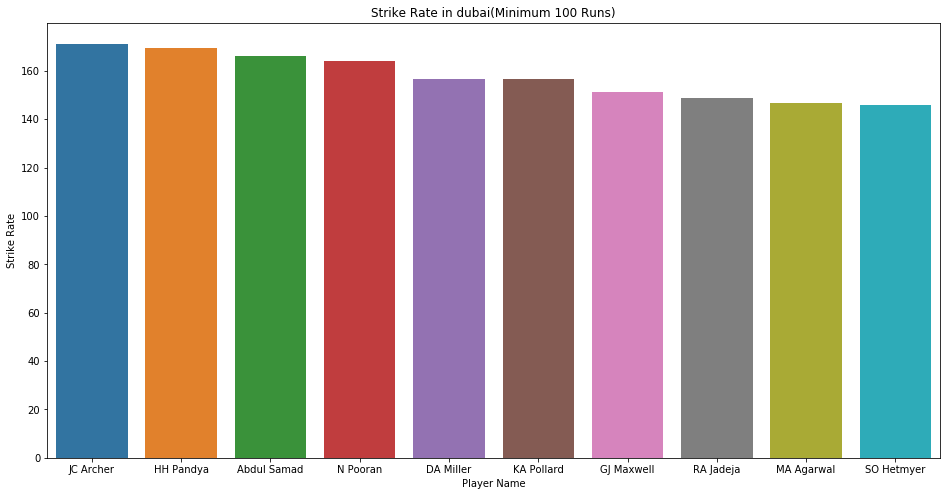

In [149]:
plt.figure(figsize=(16,8))
sns.barplot(data=dubai_df_all,x='striker',y='SR')
plt.title('Strike Rate in dubai(Minimum 100 Runs)')
plt.xlabel('Player Name')
plt.ylabel('Strike Rate')
plt.show()

In [150]:
dubai_df

,year,Innings,runs_off_bat,ball,SR
0,2014,5,90,59,152.542373
1,2020,12,200,172,116.279070


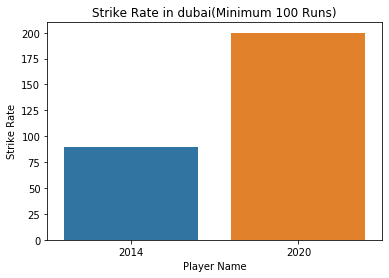

In [153]:
sns.barplot(data=dubai_df,x='year',y='runs_off_bat')
plt.title('Strike Rate in dubai(Minimum 100 Runs)')
plt.xlabel('Player Name')
plt.ylabel('Strike Rate')
plt.show()

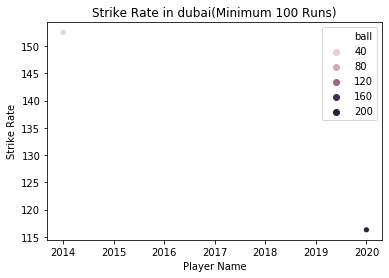

In [158]:
sns.scatterplot(data=dubai_df,x='year',y='SR',hue='ball')
plt.title('Strike Rate in dubai(Minimum 100 Runs)')
plt.xlabel('Player Name')
plt.ylabel('Strike Rate')
plt.show()

In [159]:
dubai_innings=msd_df_dbi[(msd_df_dbi['venue']=='Dubai International Cricket Stadium')|
      (msd_df_dbi['venue']=='Sheikh Zayed Stadium')|
      (msd_df_dbi['venue']=='Sharjah Cricket Stadium')]

In [165]:
dubai_all_innngs=pd.DataFrame(dubai_innings.groupby('match_id')['runs_off_bat'].sum()).reset_index()

In [186]:
dubai_all_innings=dubai_all_innings.reset_index()

In [194]:
dubai_all_innings['index']=dubai_all_innings['index']-1
dubai_all_innings.rename(columns={'index':'Innings'},inplace=True)

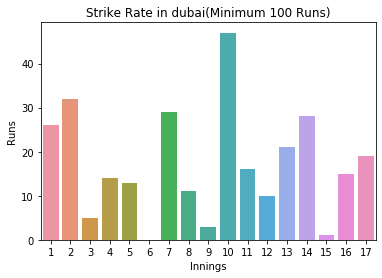

In [197]:
sns.barplot(data=dubai_all_innings,x='Innings',y='runs_off_bat')
plt.title('Strike Rate in dubai(Minimum 100 Runs)')
plt.xlabel('Innings')
plt.ylabel('Runs')
plt.show()